Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch 0001 cost 0.080799975
epoch 0002 cost 0.054871149
epoch 0003 cost 0.048387721
epoch 0004 cost 0.043937683
epoch 0005 cost 0.042008787
epoch 0006 cost 0.038137328
epoch 0007 cost 0.036753267
epoch 0008 cost 0.036606878
epoch 0009 cost 0.033941370
epoch 0010 cost 0.033581674
Finished!


C:\prog\anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


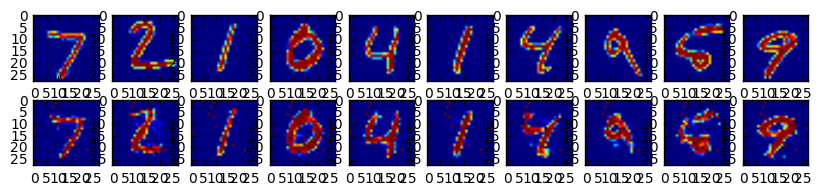

In [1]:
%matplotlib inline
from __future__ import division, print_function, absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#导入mnist数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

learning_rate=0.01#学习率
n_hidden=256      #中间层神经元个数
n_input=784       #输入输出层神经元个数

X=tf.placeholder("float",[None,n_input])#待输入数据
#权重
weights={
    'encoder_w':tf.Variable(tf.random_normal([n_input,n_hidden])),
    'decoder_w':tf.Variable(tf.random_normal([n_hidden,n_input])),
}
#偏置
biases={
    'encoder_b':tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b':tf.Variable(tf.random_normal([n_input])),
}
#编码过程
def encoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_w']),biases['encoder_b']))
#解码过程
def decoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_w']),biases['decoder_b']))

encoder_op=encoder(X)#编码开始
decoder_op=decoder(encoder_op)#解码开始

y_pred=decoder_op#预测值
y_ture=X#真实值（输入值）

cost=tf.reduce_mean(tf.pow(y_ture-y_pred,2))#代价函数
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)#优化过程

init=tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(10):#训练十轮
        for i in range(300):#每轮300次
            batch_xs,batch_ys=mnist.train.next_batch(256)#每个步骤随机抓取256个批处理数据点
            _,c=sess.run([optimizer,cost],feed_dict={X:batch_xs})#运行
        print("epoch",'%04d'%(epoch+1),"cost","{:.9f}".format(c))
    print("Finished!")

    #评估模型（可视化结果）
    encode_decode=sess.run(y_pred,feed_dict={X:mnist.test.images[:10]})
    f,a=plt.subplots(2,10,figsize=(10,2))

    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()